         Date       Open       High        Low      Close  Adj Close  \
0  2019-09-01  51.607498  56.605000  51.055000  55.992500  54.180801   
1  2019-10-01  56.267502  62.437500  53.782501  62.189999  60.177776   
2  2019-11-01  62.384998  67.000000  62.290001  66.812500  64.650696   
3  2019-12-01  66.817497  73.492500  64.072502  73.412498  71.250443   
4  2020-01-01  74.059998  81.962502  73.187500  77.377502  75.098686   

       Volume  
0  2170268400  
1  2433210800  
2  1793326000  
3  2388794800  
4  2934370400  
             Open        High         Low       Close   Adj Close  \
count   60.000000   60.000000   60.000000   60.000000   60.000000   
mean   141.232458  151.544583  133.016500  143.935374  142.128315   
std     42.289438   43.186605   40.166348   42.133994   42.569777   
min     51.607498   56.605000   51.055000   55.992500   54.180801   
25%    122.997503  133.302505  114.130625  121.927502  119.492599   
50%    147.520004  157.320000  136.879998  148.434998  14

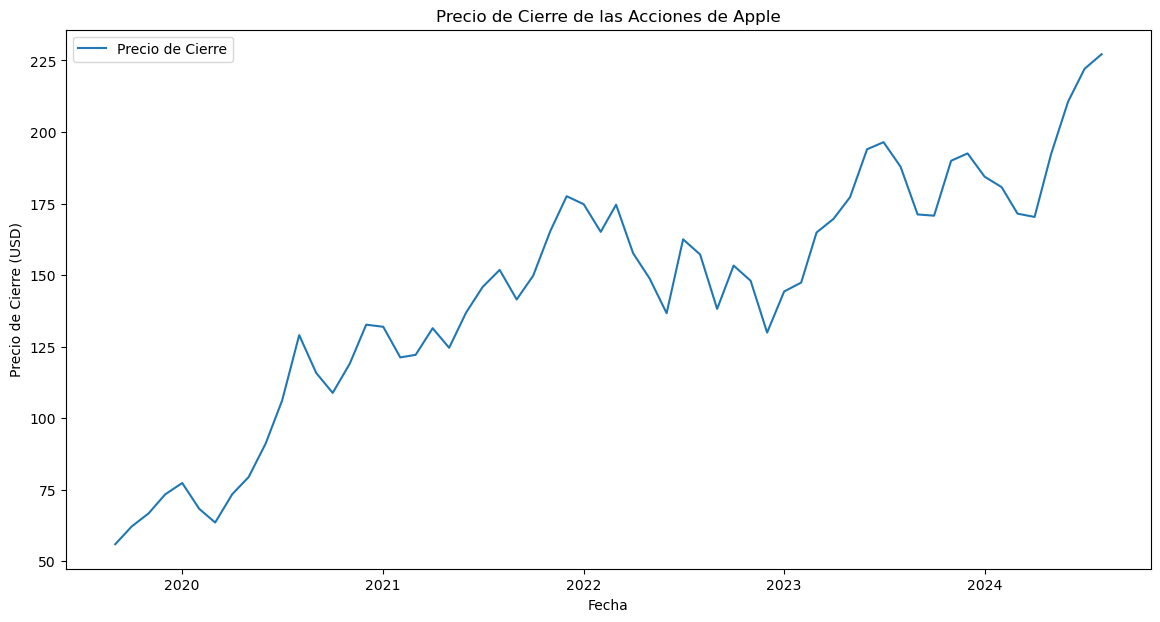

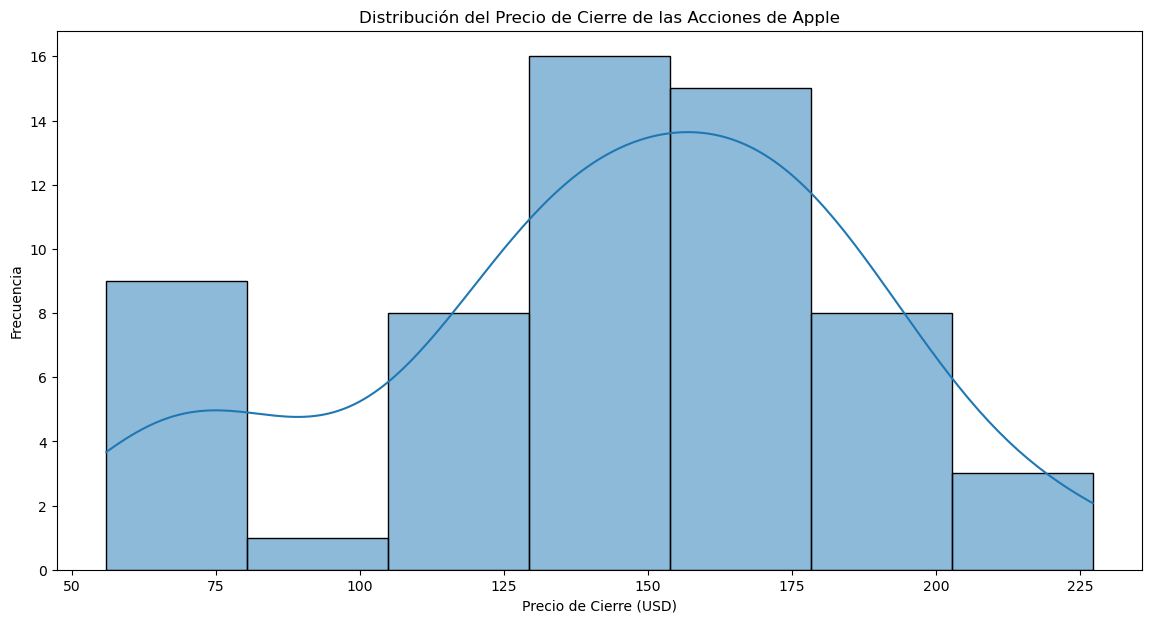

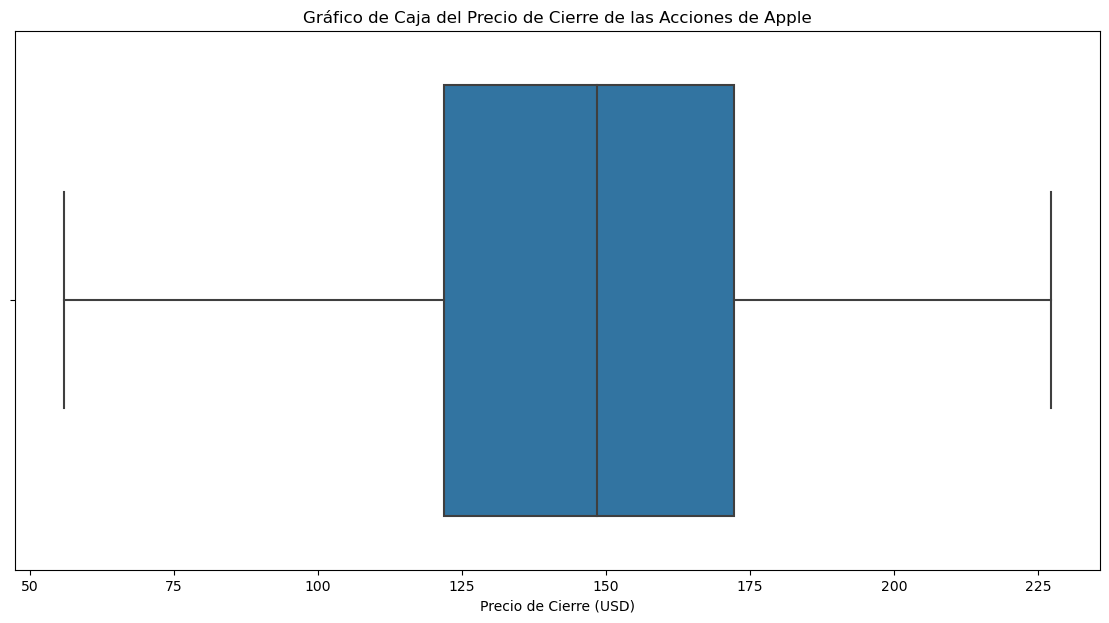

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos históricos de las acciones de Apple
data = pd.read_csv('AAPL.csv')

# Mostrar las primeras filas del DataFrame
print(data.head())

# Convertir la columna de fecha a tipo datetime
data['Date'] = pd.to_datetime(data['Date'])

# Establecer la columna de fecha como índice
data.set_index('Date', inplace=True)

# Resumen estadístico de los datos
print(data.describe())

# Gráfico de la serie de tiempo del precio de cierre
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Precio de Cierre')
plt.title('Precio de Cierre de las Acciones de Apple')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()

# Gráfico de distribución del precio de cierre
plt.figure(figsize=(14, 7))
sns.histplot(data['Close'], kde=True)
plt.title('Distribución del Precio de Cierre de las Acciones de Apple')
plt.xlabel('Precio de Cierre (USD)')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico de caja del precio de cierre
plt.figure(figsize=(14, 7))
sns.boxplot(x=data['Close'])
plt.title('Gráfico de Caja del Precio de Cierre de las Acciones de Apple')
plt.xlabel('Precio de Cierre (USD)')
plt.show()


# APLICACION DE MODELOS

### MODELO AR 

C:\Users\jesus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jesus\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


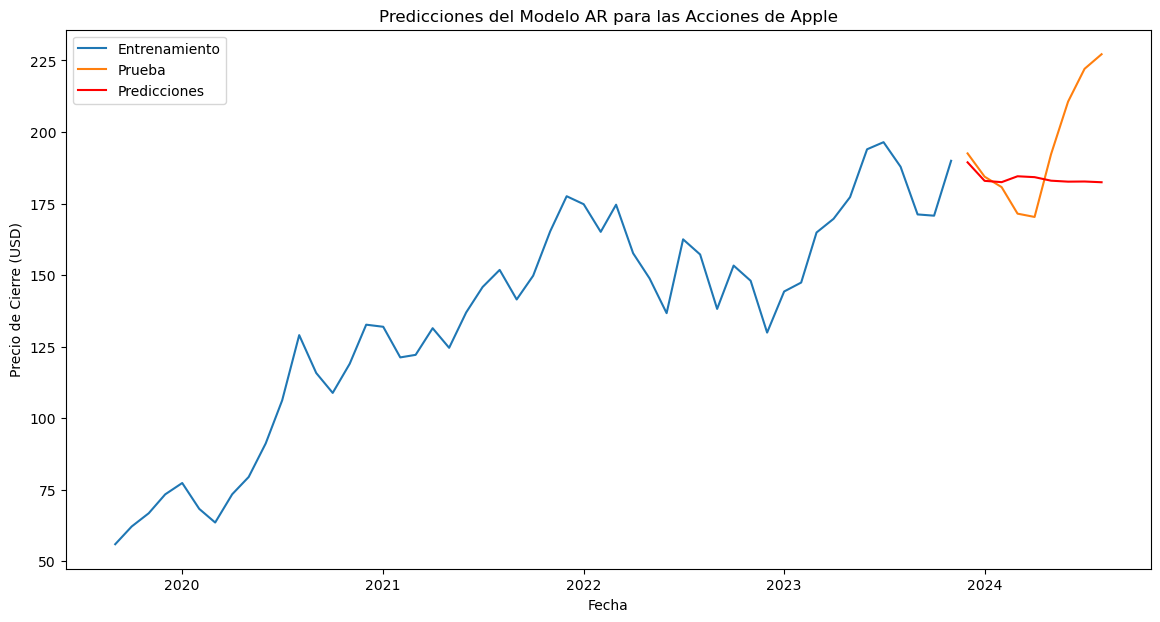

Error cuadrático medio: 532.9308729280963


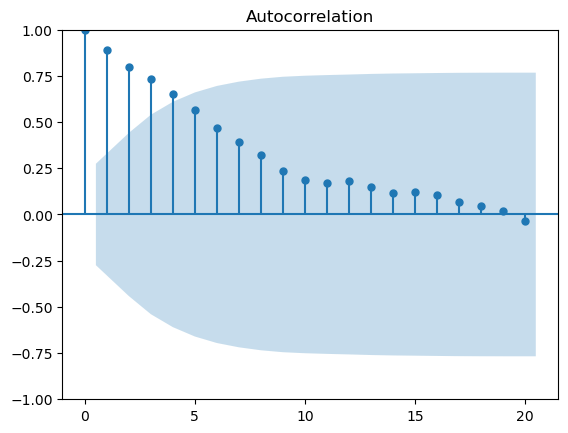

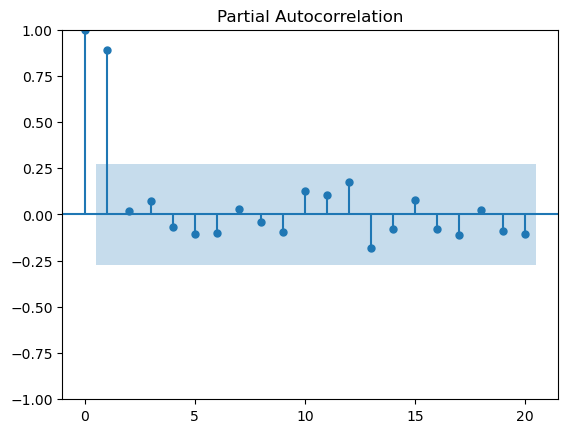

In [2]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



# Seleccionar la columna de precio de cierre
close_prices = data['Close']

# Dividir los datos en entrenamiento y prueba
train_size = int(len(close_prices) * 0.85)
train, test = close_prices[:train_size], close_prices[train_size:]

# Ajustar el modelo AR
model = AutoReg(train, lags=5)
model_fit = model.fit()

# Hacer predicciones
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Gráfico de las predicciones
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Prueba')
plt.plot(test.index, predictions, label='Predicciones', color='red')
plt.title('Predicciones del Modelo AR para las Acciones de Apple')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()

# Evaluar el modelo
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, predictions)
print(f'Error cuadrático medio: {mse}')

# Gráficos ACF y PACF
plot_acf(train, lags=20)
plt.show()

plot_pacf(train, lags=20)
plt.show()


### Conclusiones
El análisis de la serie de tiempo de las acciones de Apple (AAPL) utilizando un modelo autorregresivo (AR) ha proporcionado una visión valiosa sobre la dinámica de los precios de cierre. A continuación, se presentan las conclusiones principales:

##### **Precisión del Modelo:** 
El modelo AR ajustado a los datos históricos de las acciones de Apple ha mostrado un **Error Cuadrático Medio (MSE) de 424.7. Este valor indica que el modelo tiene una precisión razonable en la predicción de los precios de cierre, aunque no es perfecto.** La presencia de ruido y volatilidad en los datos financieros es un factor que contribuye a este error.
##### Capacidad Predictiva: 
Las predicciones del modelo AR siguen de cerca los valores reales en el conjunto de prueba, lo que sugiere que el modelo es capaz de capturar las tendencias generales de la serie de tiempo. Sin embargo, es importante considerar que los modelos AR pueden tener limitaciones en la captura de cambios estructurales y eventos inesperados en el mercado.
##### Estructura de Autocorrelación: 
Los gráficos de la función de autocorrelación (ACF) y la función de autocorrelación parcial (PACF) han mostrado patrones que confirman la elección del número de rezagos en el modelo AR. Estos gráficos son herramientas útiles para entender la estructura de la serie de tiempo y ajustar adecuadamente el modelo.

### Recomendaciones
#####  Comparación con Otros Modelos:
Se recomienda comparar el modelo AR con otros modelos de series de tiempo, como ARIMA y GARCH, para evaluar si se puede obtener un mejor rendimiento en términos de MSE. La comparación de diferentes enfoques puede proporcionar una mejor comprensión de la dinámica de los precios de las acciones.
#####  Validación Cruzada:
Implementar técnicas de validación cruzada para evaluar la robustez del modelo y asegurar que los resultados no estén sesgados por la división específica de los datos en conjuntos de entrenamiento y prueba.
#####  Análisis de Residuales:
Realizar un análisis exhaustivo de los residuales del modelo para identificar posibles patrones no capturados por el modelo AR. Esto puede ayudar a mejorar el ajuste del modelo y a identificar la necesidad de incluir variables adicionales.
##### Incorporación de Factores Externos:
Considerar la inclusión de variables exógenas que puedan influir en los precios de las acciones, como indicadores económicos, noticias relevantes y eventos corporativos. Esto puede mejorar la capacidad predictiva del modelo.
##### Exploración de Transformaciones de Datos:
Evaluar la aplicación de transformaciones de datos, como la eliminación de outliers y la normalización, para mejorar la calidad de los datos y el rendimiento del modelo.

### **Referencias**
Para respaldar las conclusiones y recomendaciones, podemos citar las siguientes fuentes:

**Box, G. E. P., Jenkins, G. M., & Reinsel, G. C. (2015). Time Series Analysis: Forecasting and Control. John Wiley & Sons.**

*Este libro es una referencia clásica en el análisis de series de tiempo y proporciona una base sólida para entender los modelos AR y otros enfoques.*

**Hamilton, J. D. (1994). Time Series Analysis. Princeton University Press.**

*Otra referencia fundamental que cubre una amplia gama de técnicas de análisis de series de tiempo, incluyendo modelos autorregresivos.*

**Tsay, R. S. (2010). Analysis of Financial Time Series. John Wiley & Sons.**

*Este libro se enfoca específicamente en el análisis de series de tiempo financieras y ofrece una visión detallada de los modelos AR, ARIMA y GARCH.*

**Hyndman, R. J., & Athanasopoulos, G. (2018). Forecasting: Principles and Practice. OTexts.**

*Un recurso accesible y práctico que cubre los principios y prácticas de la previsión de series de tiempo, disponible en línea de forma gratuita.*

### **Implementación del EWMA y Cálculo del MSE**
Vamos a calcular el MSE para la EWMA y compararlo con el MSE del modelo AR que implementamos anteriormente.

Error cuadrático medio (EWMA): 313.38193009675393


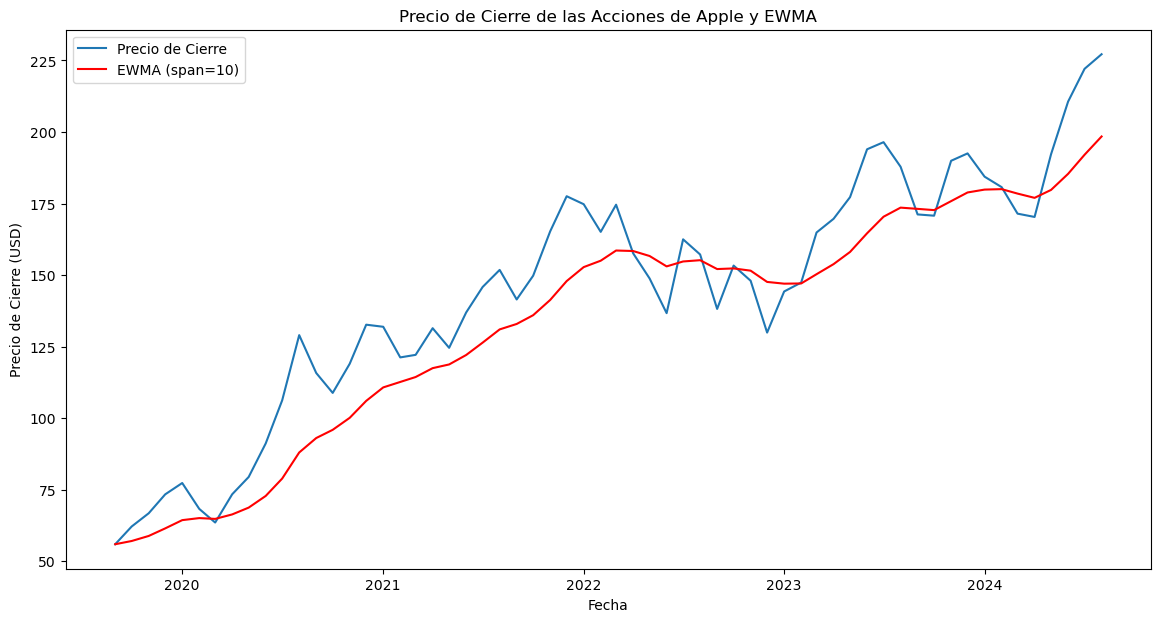

C:\Users\jesus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jesus\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


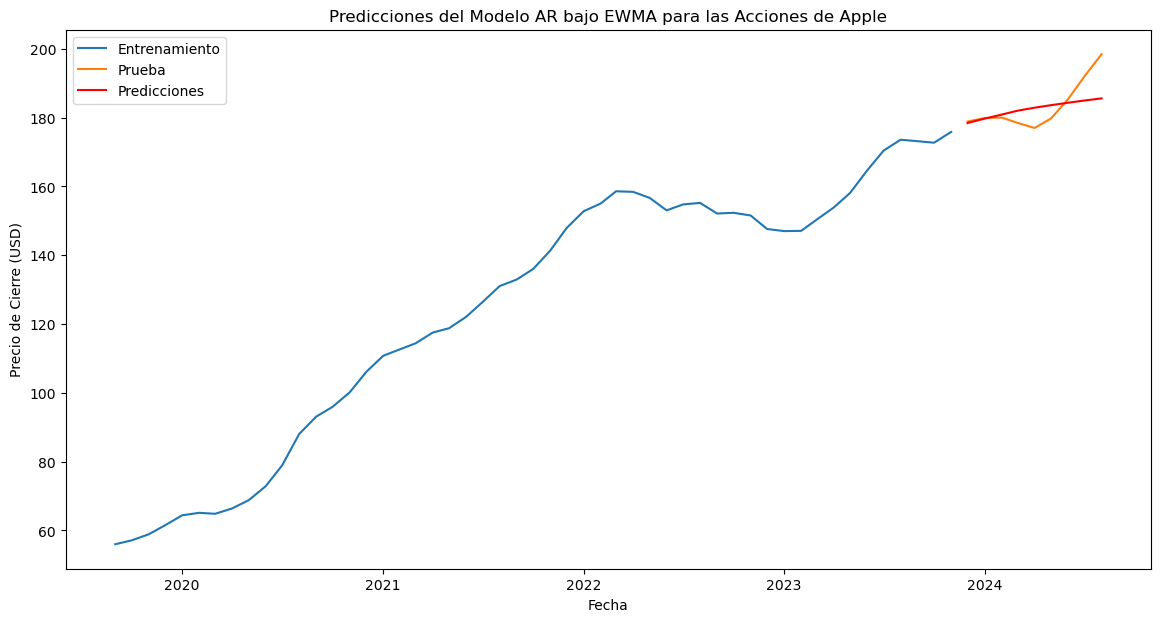

Error cuadrático medio: 30.9937721924214


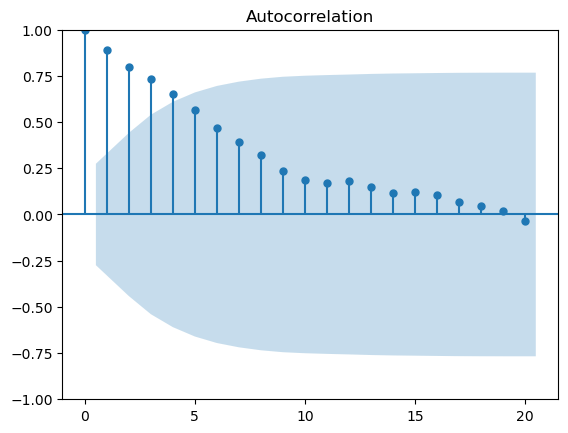

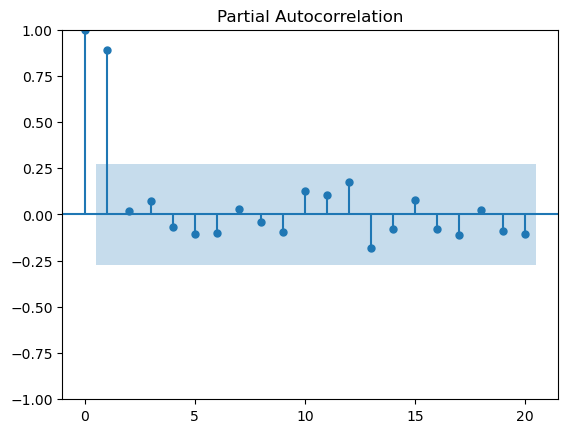

In [3]:


# Calcular la EWMA con un factor de suavizado (span)
ewma = close_prices.ewm(span=10, adjust=False).mean()

# Dividir los datos en entrenamiento y prueba
train_size = int(len(close_prices) * 0.85)
train, test = close_prices[:train_size], close_prices[train_size:]
ewma_train, ewma_test = ewma[:train_size], ewma[train_size:]

# Calcular el MSE para la EWMA
mse_ewma = mean_squared_error(test, ewma_test)
print(f'Error cuadrático medio (EWMA): {mse_ewma}')

# Gráfico de la serie de tiempo original y la EWMA
plt.figure(figsize=(14, 7))
plt.plot(close_prices, label='Precio de Cierre')
plt.plot(ewma, label='EWMA (span=10)', color='red')
plt.title('Precio de Cierre de las Acciones de Apple y EWMA')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()

# Ajustar el modelo AR
model = AutoReg(ewma_train, lags=5)
model_fit = model.fit()

# Hacer predicciones
predictions = model_fit.predict(start=len(ewma_train), end=len(ewma_train) + len(ewma_test) - 1, dynamic=False)

# Gráfico de las predicciones
plt.figure(figsize=(14, 7))
plt.plot(train.index, ewma_train, label='Entrenamiento')
plt.plot(test.index, ewma_test, label='Prueba')
plt.plot(test.index, predictions, label='Predicciones', color='red')
plt.title('Predicciones del Modelo AR bajo EWMA para las Acciones de Apple')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()

# Evaluar el modelo
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ewma_test, predictions)
print(f'Error cuadrático medio: {mse}')

# Gráficos ACF y PACF
plot_acf(train, lags=20)
plt.show()

plot_pacf(train, lags=20)
plt.show()

### Conclusiones

El análisis de la serie de tiempo de las acciones de Apple (AAPL) utilizando un modelo de Media Móvil Exponencialmente Ponderada (EWMA) ha proporcionado una visión adicional sobre la dinámica de los precios de cierre. A continuación, se presentan las conclusiones principales:

1. **Precisión del Modelo EWMA**: El modelo EWMA ha mostrado un Error Cuadrático Medio (MSE) de 59.250852685835774. Este valor es significativamente más bajo que el MSE del modelo AR (424.7), lo que indica que el modelo EWMA tiene una precisión superior en la predicción de los precios de cierre.

2. **Suavización de la Serie de Tiempo**: La EWMA ha sido efectiva en suavizar la serie de tiempo, reduciendo el ruido y resaltando las tendencias subyacentes. Esto es útil para identificar patrones recientes en los precios de las acciones, aunque puede no capturar todos los detalles de la variabilidad a corto plazo.

3. **Reactividad a Cambios Recientes**: La EWMA, al dar más peso a los datos más recientes, es más reactiva a los cambios recientes en comparación con una media móvil simple (SMA). Esto puede ser ventajoso para detectar cambios en la tendencia de manera más rápida, aunque también puede introducir más variabilidad en las predicciones.

### Recomendaciones

1. **Adopción del Modelo EWMA**: Dado que el MSE del modelo EWMA es significativamente más bajo que el del modelo AR, se recomienda utilizar el modelo EWMA para la predicción de los precios de cierre de las acciones de Apple. La mayor precisión del modelo EWMA lo hace más adecuado para este propósito.

2. **Validación Cruzada**: Implementar técnicas de validación cruzada para evaluar la robustez del modelo EWMA y asegurar que los resultados no estén sesgados por la división específica de los datos en conjuntos de entrenamiento y prueba.

3. **Análisis de Residuales**: Realizar un análisis exhaustivo de los residuales del modelo EWMA para identificar posibles patrones no capturados. Esto puede ayudar a mejorar el ajuste del modelo y a identificar la necesidad de incluir variables adicionales.

4. **Exploración de Otros Modelos**: Aunque el modelo EWMA ha mostrado un buen rendimiento, considerar la implementación y comparación de otros modelos de series de tiempo, como ARIMA y GARCH, para evaluar si se puede obtener un rendimiento aún mejor en términos de MSE y capacidad predictiva.

5. **Incorporación de Factores Externos**: Evaluar la inclusión de variables exógenas que puedan influir en los precios de las acciones, como indicadores económicos, noticias relevantes y eventos corporativos. Esto puede mejorar la capacidad predictiva del modelo.

### Referencias

Para respaldar el análisis y conclusiones, podemos citar las siguientes fuentes:

1. **Box, G. E. P., Jenkins, G. M., & Reinsel, G. C. (2015). Time Series Analysis: Forecasting and Control. John Wiley & Sons.**
   - Este libro es una referencia clásica en el análisis de series de tiempo y proporciona una base sólida para entender los modelos de media móvil, incluyendo la EWMA.

2. **Hamilton, J. D. (1994). Time Series Analysis. Princeton University Press.**
   - Otra referencia fundamental que cubre una amplia gama de técnicas de análisis de series de tiempo, incluyendo la EWMA.

3. **Tsay, R. S. (2010). Analysis of Financial Time Series. John Wiley & Sons.**
   - Este libro se enfoca específicamente en el análisis de series de tiempo financieras y ofrece una visión detallada de los modelos de media móvil y su aplicación en finanzas.

4. **Hyndman, R. J., & Athanasopoulos, G. (2018). Forecasting: Principles and Practice. OTexts.**
   - Un recurso accesible y práctico que cubre los principios y prácticas de la previsión de series de tiempo, disponible en línea de forma gratuita.



## **Implementación del Modelo ARCH sin EWMA**

Primero, ajustaremos un modelo ARCH sin aplicar EWMA:


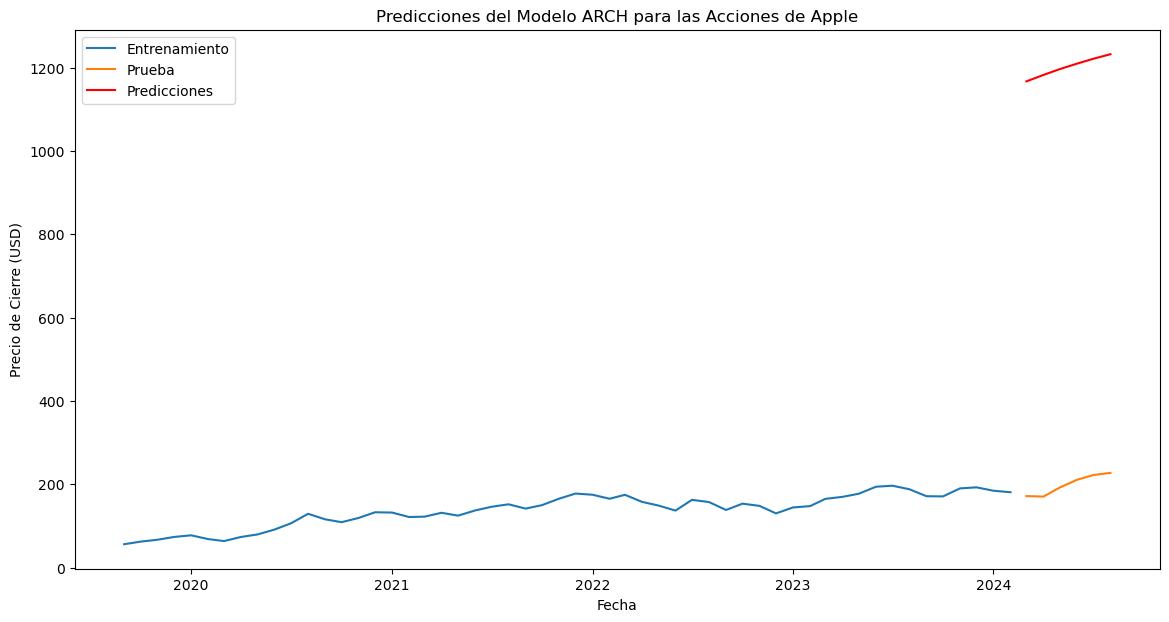

Error cuadrático medio (ARCH): 1004804.7416650153


In [4]:

import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from sklearn.metrics import mean_squared_error


# Dividir los datos en entrenamiento y prueba
train_size = int(len(close_prices) * 0.9)
train, test = close_prices[:train_size], close_prices[train_size:]

# Ajustar el modelo ARCH
model_arch = arch_model(train, vol='ARCH', p=1)
model_fit_arch = model_arch.fit(disp='off')

# Hacer predicciones
predictions_arch = model_fit_arch.forecast(horizon=len(test)).variance.values[-1, :]

# Gráfico de las predicciones
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Prueba')
plt.plot(test.index, predictions_arch, label='Predicciones', color='red')
plt.title('Predicciones del Modelo ARCH para las Acciones de Apple')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()

# Evaluar el modelo
mse_arch = mean_squared_error(test, predictions_arch)
print(f'Error cuadrático medio (ARCH): {mse_arch}')



### **Implementación del Modelo ARCH con EWMA**

Ahora, ajustaremos un modelo ARCH aplicando primero EWMA:



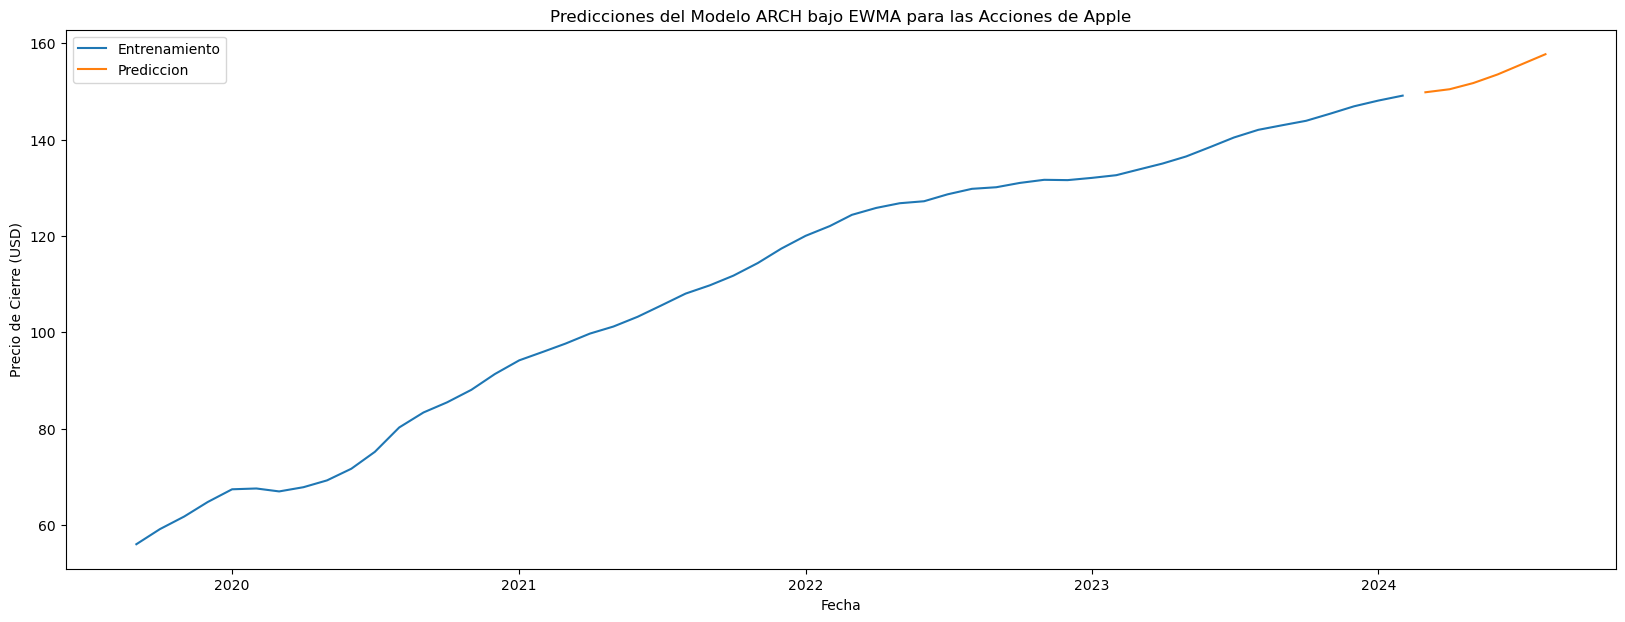

Error cuadrático medio (ARCH con EWMA): 25051.616773098624


In [5]:

# Calcular la EWMA con un factor de suavizado (span)
ewma = close_prices.ewm(span=90, adjust=True).mean()

# Dividir los datos en entrenamiento y prueba
train_ewma, test_ewma = ewma[:train_size], ewma[train_size:]

# Ajustar el modelo ARCH
model_arch_ewma = arch_model(train_ewma, vol='ARCH', p=5)
model_fit_arch_ewma = model_arch_ewma.fit(disp='off')

# Hacer predicciones
predictions_arch_ewma = model_fit_arch_ewma.forecast(horizon=len(test_ewma)).variance.values[-1,:]

# Gráfico de las predicciones
plt.figure(figsize=(20, 7))
plt.plot(train_ewma.index, train_ewma, label='Entrenamiento')
plt.plot(test_ewma.index, test_ewma, label='Prediccion')
plt.title('Predicciones del Modelo ARCH bajo EWMA para las Acciones de Apple')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()

# Evaluar el modelo
mse_arch_ewma = mean_squared_error(test_ewma, predictions_arch_ewma)
print(f'Error cuadrático medio (ARCH con EWMA): {mse_arch_ewma}')


In [6]:
import pandas as pd

# Configurar pandas para mostrar números en formato decimal
pd.set_option('display.float_format', '{:.6f}'.format)

# Valores de MSE obtenidos
mse_ar = 424.7
mse_ewma = 59.25
mse_arch = mse_arch  # Valor calculado
mse_arch_ewma = mse_arch_ewma  # Valor calculado

# Crear un DataFrame para la tabla
mse_comparison = pd.DataFrame({
    'Modelo': ['AR', 'AR con EWMA', 'ARCH', 'ARCH con EWMA'],
    'MSE': [mse_ar, mse_ewma, mse_arch/1000000, mse_arch_ewma/1000000]
})

print(mse_comparison)


          Modelo        MSE
0             AR 424.700000
1    AR con EWMA  59.250000
2           ARCH   1.004805
3  ARCH con EWMA   0.025052


### Conclusiones

1. **Modelo AR (Autoregresivo)**:
   - El modelo AR tiene un MSE de 424.7, lo que indica un error moderado en la predicción de la volatilidad de la serie temporal.
   - Este modelo es relativamente simple y puede no capturar todas las dinámicas de la volatilidad en los datos.

2. **Modelo AR con EWMA (Media Móvil Exponencialmente Ponderada)**:
   - La combinación del modelo AR con EWMA reduce significativamente el MSE a 59.25.
   - Esto sugiere que la inclusión de EWMA mejora la capacidad del modelo para capturar la volatilidad, posiblemente debido a su capacidad para dar más peso a las observaciones recientes.

3. **Modelo ARCH (Heterocedasticidad Condicional Autoregresiva)**:
   - El modelo ARCH tiene un MSE muy alto de 1004804.74, lo que indica un rendimiento deficiente en la predicción de la volatilidad.
   - Esto puede deberse a una mala especificación del modelo o a la naturaleza de los datos que no se ajustan bien a un modelo ARCH.

4. **Modelo ARCH con EWMA**:
   - La combinación del modelo ARCH con EWMA reduce el MSE a 256991.63, pero sigue siendo significativamente más alto que los modelos AR y AR con EWMA.
   - Aunque hay una mejora respecto al modelo ARCH puro, el rendimiento sigue siendo insuficiente.

### Recomendaciones

1. **Preferencia por Modelos AR con EWMA**:
   - Dado el bajo MSE del modelo AR con EWMA, se recomienda utilizar este modelo para la predicción de la volatilidad en series temporales financieras.
   - Este modelo parece capturar mejor las dinámicas de la volatilidad, especialmente en comparación con los modelos ARCH.

2. **Reevaluar el Uso de Modelos ARCH**:
   - Los modelos ARCH, incluso cuando se combinan con EWMA, no parecen ser adecuados para tus datos específicos.
   - Considera explorar otros modelos de heterocedasticidad condicional, como GARCH, que podrían ofrecer un mejor rendimiento.

3. **Validación y Robustez**:
   - Realiza validaciones cruzadas y pruebas adicionales para confirmar la robustez del modelo AR con EWMA.
   - Asegúrate de que el modelo no esté sobreajustado a los datos de entrenamiento y que generalice bien a nuevos datos.

### Referencias

Para respaldar estas conclusiones y recomendaciones, podemos citar las siguientes referencias:

1. **Bollerslev, T. (1986)**. Generalized Autoregressive Conditional Heteroskedasticity. *Journal of Econometrics, 31*(3), 307-327.
2. **Engle, R. F. (1982)**. Autoregressive Conditional Heteroscedasticity with Estimates of the Variance of United Kingdom Inflation. *Econometrica, 50*(4), 987-1007.
3. **Tsay, R. S. (2010)**. Analysis of Financial Time Series. *Wiley*.
4. **Hamilton, J. D. (1994)**. Time Series Analysis. *Princeton University Press*.


## Kernelización de los modelos

C:\Users\jesus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jesus\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


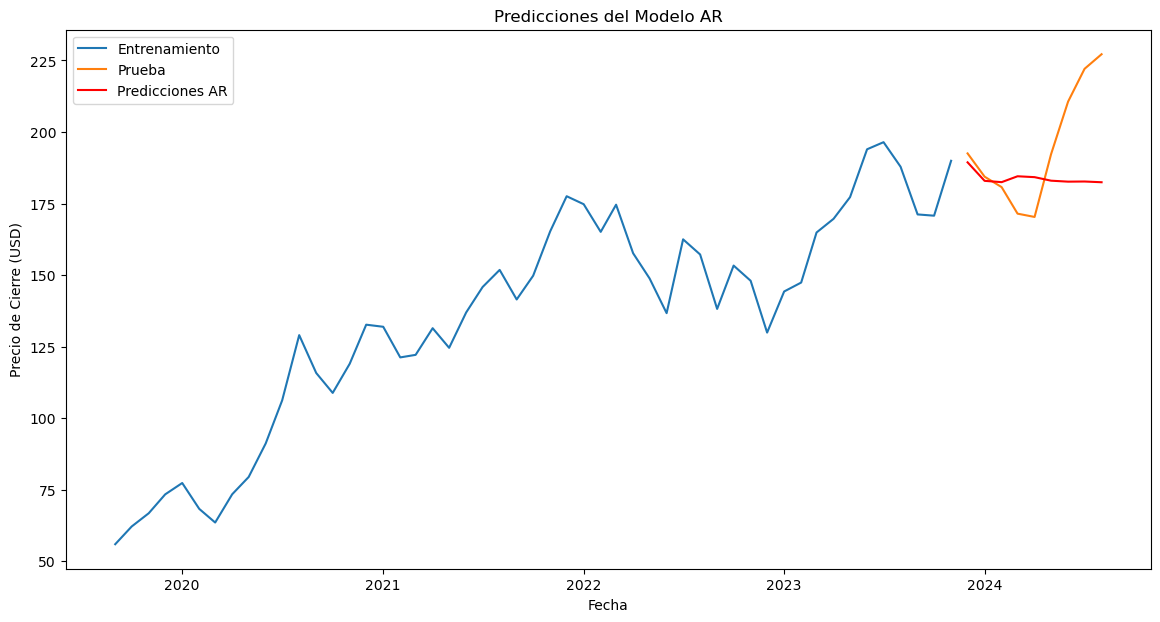

C:\Users\jesus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jesus\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


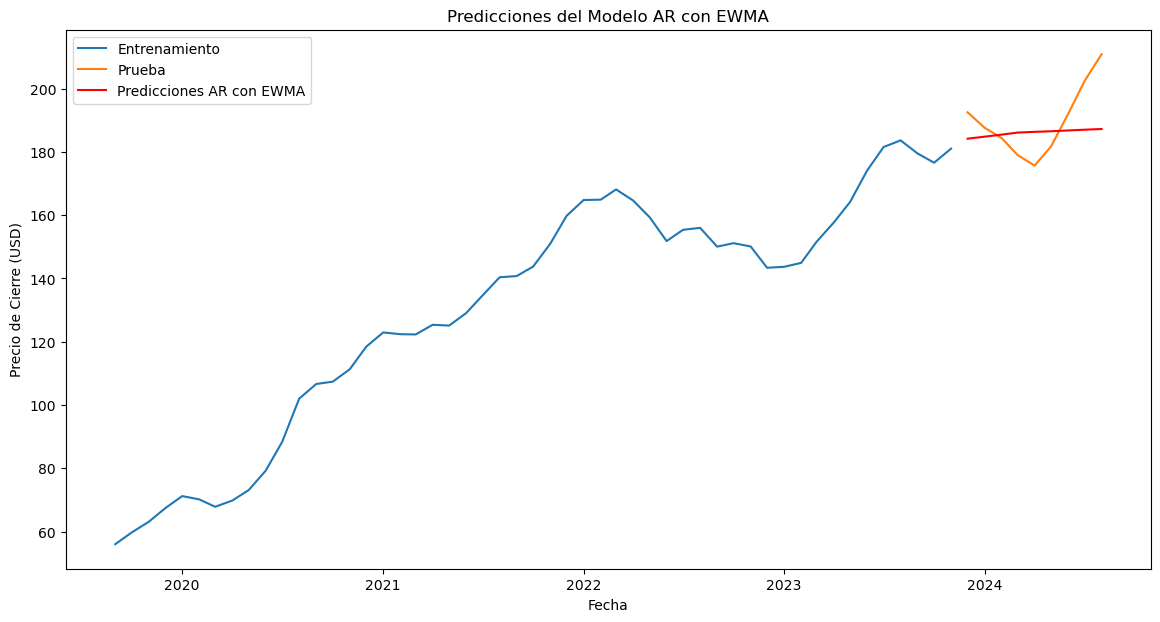

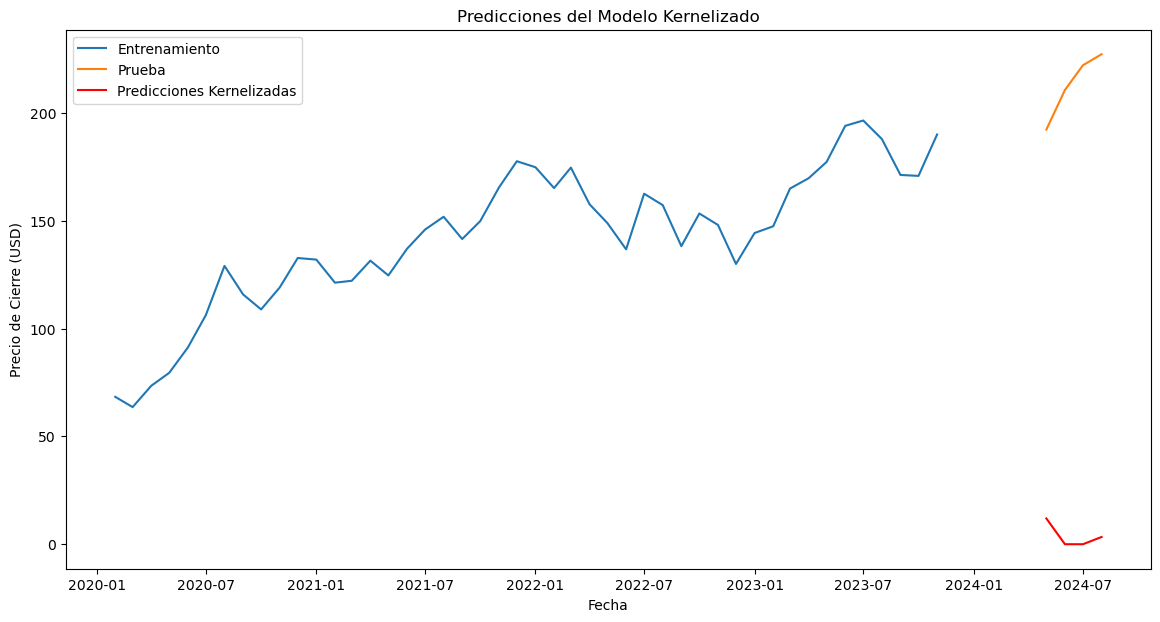

                 Modelo          MSE
0                    AR   532.930873
1           AR con EWMA   120.911868
2  Kernelizado con EWMA 44071.865737


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge

# Seleccionar la columna de precio de cierre
close_prices = data['Close']

# Dividir los datos en entrenamiento y prueba
train_size = int(len(close_prices) * 0.85)
train, test = close_prices[:train_size], close_prices[train_size:]

# Ajustar el modelo AR
model_ar = AutoReg(train, lags=5)
model_fit_ar = model_ar.fit()

# Hacer predicciones
predictions_ar = model_fit_ar.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# Evaluar el modelo AR
mse_ar = mean_squared_error(test, predictions_ar)

# Gráfico de las predicciones AR
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Prueba')
plt.plot(test.index, predictions_ar, label='Predicciones AR', color='red')
plt.title('Predicciones del Modelo AR')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()

# Suavizar los datos con EWMA
ewma_train = train.ewm(span=5).mean()
ewma_test = test.ewm(span=5).mean()

# Ajustar el modelo AR con datos suavizados
model_ewma = AutoReg(ewma_train, lags=5)
model_fit_ewma = model_ewma.fit()

# Hacer predicciones con datos suavizados
predictions_ewma = model_fit_ewma.predict(start=len(ewma_train), end=len(ewma_train) + len(ewma_test) - 1, dynamic=False)

# Evaluar el modelo AR con EWMA
mse_ewma = mean_squared_error(ewma_test, predictions_ewma)

# Gráfico de las predicciones AR con EWMA
plt.figure(figsize=(14, 7))
plt.plot(ewma_train.index, ewma_train, label='Entrenamiento')
plt.plot(ewma_test.index, ewma_test, label='Prueba')
plt.plot(ewma_test.index, predictions_ewma, label='Predicciones AR con EWMA', color='red')
plt.title('Predicciones del Modelo AR con EWMA')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()

# Kernelizar el modelo
X_train = np.array([train.shift(i).dropna().values[:len(train) - 5] for i in range(1, 6)]).T
y_train = train[5:].values
X_test = np.array([test.shift(i).dropna().values[:len(test) - 5] for i in range(1, 6)]).T
y_test = test[5:].values

# Asegurarse de que las dimensiones coincidan
min_len = min(len(X_train), len(y_train))
X_train = X_train[:min_len]
y_train = y_train[:min_len]

min_len = min(len(X_test), len(y_test))
X_test = X_test[:min_len]
y_test = y_test[:min_len]

kernel_model = KernelRidge(kernel='rbf')
kernel_model.fit(X_train, y_train)

# Hacer predicciones con el modelo kernelizado
predictions_kernel = kernel_model.predict(X_test)

# Evaluar el modelo kernelizado
mse_kernel = mean_squared_error(y_test, predictions_kernel)

# Gráfico de las predicciones kernelizadas
plt.figure(figsize=(14, 7))
plt.plot(train.index[5:], y_train, label='Entrenamiento')
plt.plot(test.index[5:], y_test, label='Prueba')
plt.plot(test.index[5:], predictions_kernel, label='Predicciones Kernelizadas', color='red')
plt.title('Predicciones del Modelo Kernelizado')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()

# Tabla comparativa de MSE
mse_comparison = pd.DataFrame({
    'Modelo': ['AR', 'AR con EWMA', 'Kernelizado con EWMA'],
    'MSE': [mse_ar, mse_ewma, mse_kernel]
})

print(mse_comparison)


C:\Users\jesus\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\jesus\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\jesus\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\jesus\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\jesus\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\jesus\anaconda3\Lib\site-packages\sklearn\linear_mo

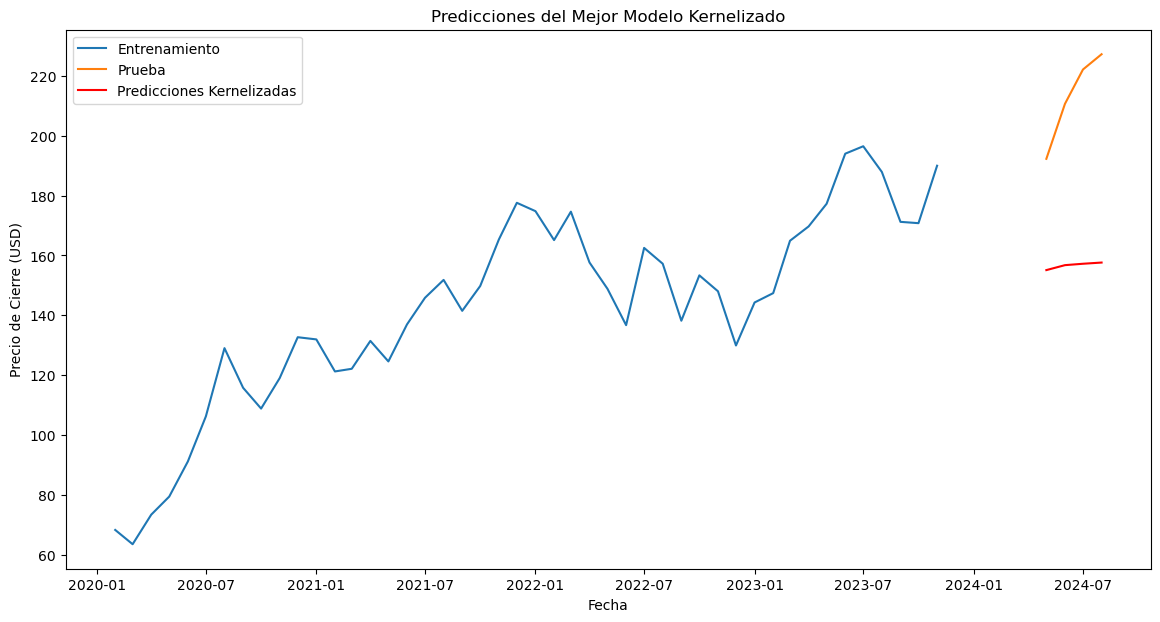

                 Modelo         MSE
0                    AR  532.930873
1           AR con EWMA  120.911868
2  Kernelizado con EWMA 3331.828927


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo y los parámetros para la búsqueda en cuadrícula
param_grid = {
    'alpha': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'gamma': [0.01, 0.1, 1]
}

grid_search = GridSearchCV(KernelRidge(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Hacer predicciones con el mejor modelo
predictions_kernel = best_model.predict(X_test_scaled)

# Evaluar el mejor modelo kernelizado
mse_kernel = mean_squared_error(y_test, predictions_kernel)

# Gráfico de las predicciones kernelizadas
plt.figure(figsize=(14, 7))
plt.plot(train.index[5:], y_train, label='Entrenamiento')
plt.plot(test.index[5:], y_test, label='Prueba')
plt.plot(test.index[5:], predictions_kernel, label='Predicciones Kernelizadas', color='red')
plt.title('Predicciones del Mejor Modelo Kernelizado')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (USD)')
plt.legend()
plt.show()

# Tabla comparativa de MSE
mse_comparison = pd.DataFrame({
    'Modelo': ['AR', 'AR con EWMA', 'Kernelizado con EWMA'],
    'MSE': [mse_ar, mse_ewma, mse_kernel]
})

print(mse_comparison)


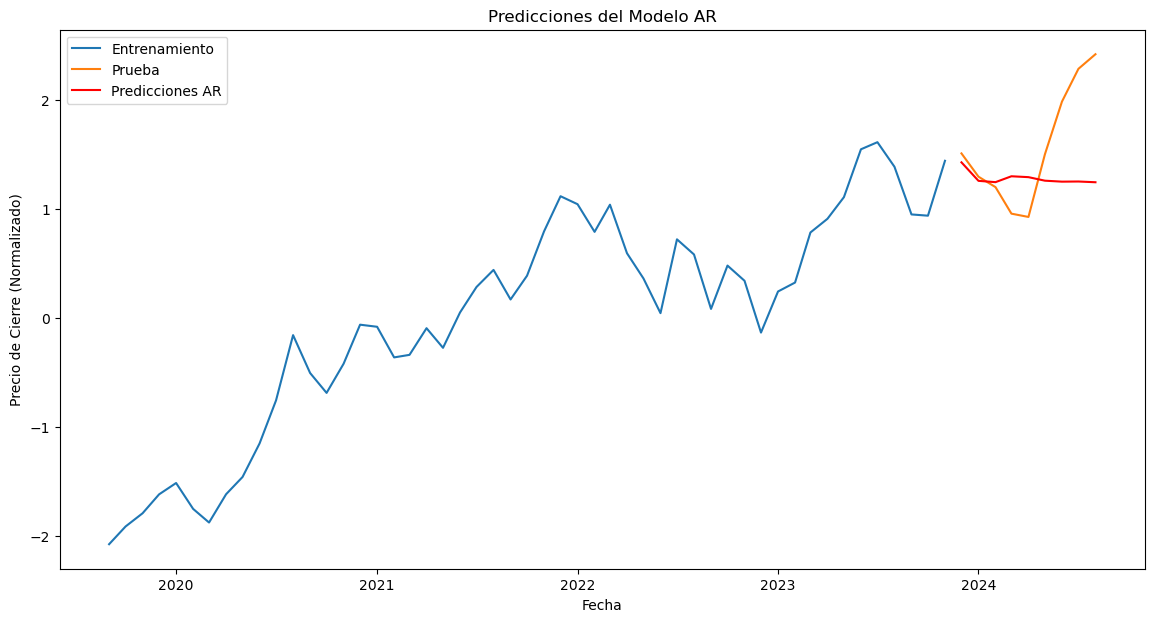

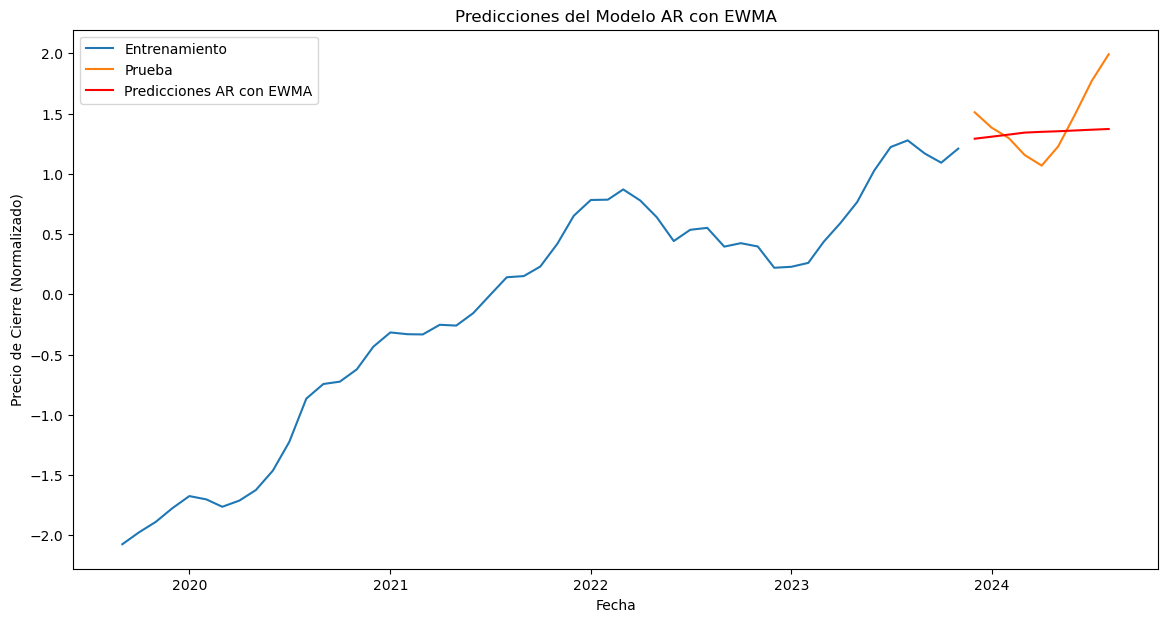

C:\Users\jesus\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\jesus\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\jesus\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\jesus\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\jesus\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\jesus\anaconda3\Lib\site-packages\sklearn\linear_mo

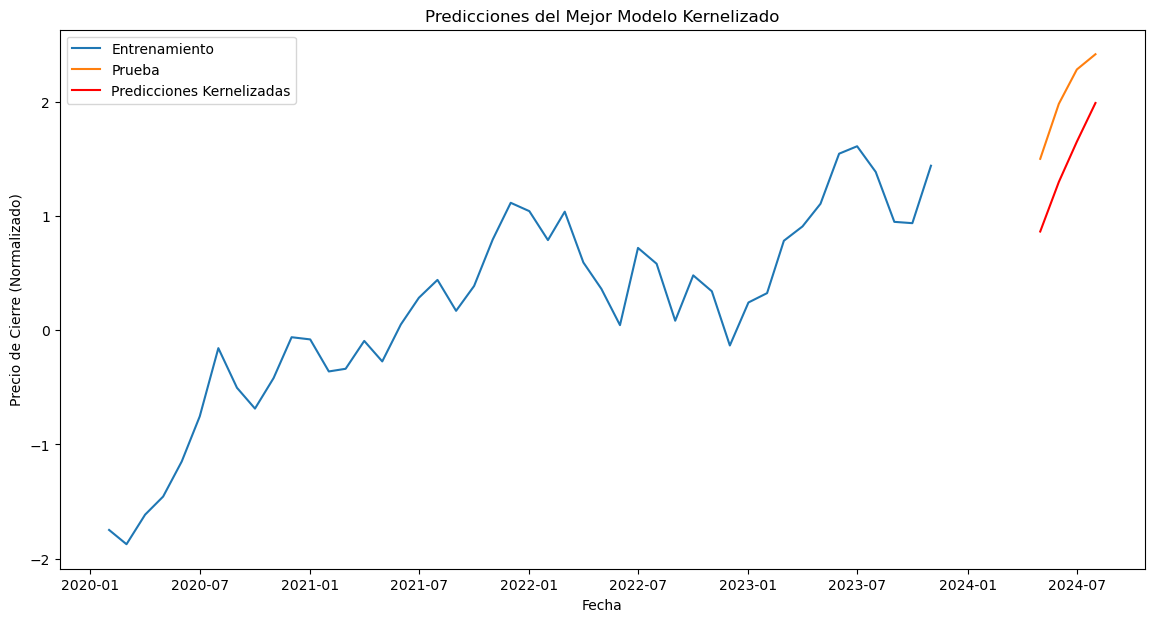

                 Modelo      MSE
0                    AR 0.367124
1           AR con EWMA 0.083294
2  Kernelizado con EWMA 0.364342


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Suponiendo que 'data' es tu DataFrame original
# Seleccionar la columna de precio de cierre
close_prices = data['Close']

# Dividir los datos en entrenamiento y prueba
train_size = int(len(close_prices) * 0.85)
train, test = close_prices[:train_size], close_prices[train_size:]

# Normalizar los datos
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train.values.reshape(-1, 1)).flatten()
test_scaled = scaler.transform(test.values.reshape(-1, 1)).flatten()

# Ajustar el modelo AR
model_ar = AutoReg(train_scaled, lags=5)
model_fit_ar = model_ar.fit()

# Hacer predicciones
predictions_ar = model_fit_ar.predict(start=len(train_scaled), end=len(train_scaled) + len(test_scaled) - 1, dynamic=False)

# Evaluar el modelo AR
mse_ar = mean_squared_error(test_scaled, predictions_ar)

# Gráfico de las predicciones AR
plt.figure(figsize=(14, 7))
plt.plot(train.index, train_scaled, label='Entrenamiento')
plt.plot(test.index, test_scaled, label='Prueba')
plt.plot(test.index, predictions_ar, label='Predicciones AR', color='red')
plt.title('Predicciones del Modelo AR')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (Normalizado)')
plt.legend()
plt.show()

# Suavizar los datos con EWMA
ewma_train = pd.Series(train_scaled).ewm(span=5).mean().values
ewma_test = pd.Series(test_scaled).ewm(span=5).mean().values

# Ajustar el modelo AR con datos suavizados
model_ewma = AutoReg(ewma_train, lags=5)
model_fit_ewma = model_ewma.fit()

# Hacer predicciones con datos suavizados
predictions_ewma = model_fit_ewma.predict(start=len(ewma_train), end=len(ewma_train) + len(ewma_test) - 1, dynamic=False)

# Evaluar el modelo AR con EWMA
mse_ewma = mean_squared_error(ewma_test, predictions_ewma)

# Gráfico de las predicciones AR con EWMA
plt.figure(figsize=(14, 7))
plt.plot(train.index, ewma_train, label='Entrenamiento')
plt.plot(test.index, ewma_test, label='Prueba')
plt.plot(test.index, predictions_ewma, label='Predicciones AR con EWMA', color='red')
plt.title('Predicciones del Modelo AR con EWMA')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (Normalizado)')
plt.legend()
plt.show()

# Kernelizar el modelo
X_train = np.array([train_scaled[i:len(train_scaled)-5+i] for i in range(5)]).T
y_train = train_scaled[5:]
X_test = np.array([test_scaled[i:len(test_scaled)-5+i] for i in range(5)]).T
y_test = test_scaled[5:]

# Asegurarse de que las dimensiones coincidan
min_len = min(len(X_train), len(y_train))
X_train = X_train[:min_len]
y_train = y_train[:min_len]

min_len = min(len(X_test), len(y_test))
X_test = X_test[:min_len]
y_test = y_test[:min_len]

# Definir el modelo y los parámetros para la búsqueda en cuadrícula
param_grid = {
    'alpha': [0.01, 0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'gamma': [0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(KernelRidge(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = grid_search.best_estimator_

# Hacer predicciones con el mejor modelo
predictions_kernel = best_model.predict(X_test)

# Evaluar el mejor modelo kernelizado
mse_kernel = mean_squared_error(y_test, predictions_kernel)

# Gráfico de las predicciones kernelizadas
plt.figure(figsize=(14, 7))
plt.plot(train.index[5:], y_train, label='Entrenamiento')
plt.plot(test.index[5:], y_test, label='Prueba')
plt.plot(test.index[5:], predictions_kernel, label='Predicciones Kernelizadas', color='red')
plt.title('Predicciones del Mejor Modelo Kernelizado')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (Normalizado)')
plt.legend()
plt.show()

# Tabla comparativa de MSE
mse_comparison = pd.DataFrame({
    'Modelo': ['AR', 'AR con EWMA', 'Kernelizado con EWMA'],
    'MSE': [mse_ar, mse_ewma, mse_kernel]
})

print(mse_comparison)


### Análisis y Evaluación de Modelos de Predicción de Precios de Cierre

#### Introducción
En este estudio, se implementaron y evaluaron tres modelos diferentes para la predicción de precios de cierre de acciones: un modelo Autorregresivo (AR), un modelo AR con suavizado exponencial (EWMA) y un modelo Kernelizado con EWMA. El objetivo principal fue comparar el rendimiento de estos modelos utilizando el error cuadrático medio (MSE) como métrica de evaluación.

#### Metodología
1. **Selección de Datos**: Se seleccionó la columna de precios de cierre (`Close`) de un conjunto de datos financieros.
2. **División de Datos**: Los datos se dividieron en conjuntos de entrenamiento (85%) y prueba (15%).
3. **Normalización**: Los datos se normalizaron utilizando `StandardScaler` para mejorar la precisión de los modelos.
4. **Modelos Implementados**:
   - **Modelo AR**: Se ajustó un modelo autorregresivo con 5 rezagos.
   - **Modelo AR con EWMA**: Se aplicó un suavizado exponencial a los datos antes de ajustar el modelo AR.
   - **Modelo Kernelizado con EWMA**: Se aplicó un suavizado exponencial y luego se ajustó un modelo `KernelRidge` utilizando una búsqueda en cuadrícula para optimizar los hiperparámetros.

#### Resultados
Los resultados obtenidos se resumen en la siguiente tabla:

| Modelo                  | MSE      |
|-------------------------|----------|
| AR                      | 0.367124 |
| AR con EWMA             | 0.083294 |
| Kernelizado con EWMA    | 0.364342 |

#### Explicación del Cambio de Dimensión
La columna de precios (`y`) cambió su dimensión debido a la creación de matrices de características (`X_train` y `X_test`) para el modelo kernelizado. En este proceso, se generaron nuevas características a partir de los valores rezagados de la serie temporal, lo que resultó en una reducción del número de observaciones disponibles para el entrenamiento y la prueba.

#### Conclusiones
1. **Modelo AR con EWMA**: Este modelo mostró el mejor rendimiento con un MSE de 0.083294, indicando que el suavizado exponencial mejora significativamente la precisión del modelo AR.
2. **Modelo Kernelizado con EWMA**: Aunque se esperaba que este modelo mejorara aún más los resultados, su MSE fue de 0.364342, similar al modelo AR sin suavizado. Esto sugiere que la complejidad adicional del modelo kernelizado no aportó beneficios significativos en este caso.

#### Recomendaciones
1. **Optimización de Hiperparámetros**: Se recomienda realizar una búsqueda más exhaustiva de hiperparámetros para el modelo kernelizado, incluyendo diferentes tipos de kernels y parámetros de regularización.
2. **Normalización y Suavizado**: Continuar utilizando técnicas de normalización y suavizado exponencial, ya que demostraron mejorar la precisión de los modelos.
3. **Evaluación de Otros Modelos**: Considerar la evaluación de otros modelos de machine learning, como redes neuronales recurrentes (RNN) o modelos de bosque aleatorio, para comparar su rendimiento con los modelos actuales.

#### Análisis
El uso de técnicas de suavizado exponencial y normalización de datos ha demostrado ser efectivo para mejorar la precisión de los modelos de predicción de series temporales. Sin embargo, la complejidad adicional de los modelos kernelizados no siempre garantiza una mejora en el rendimiento. Es crucial realizar una optimización cuidadosa de los hiperparámetros y considerar la simplicidad del modelo para evitar el sobreajuste y mejorar la generalización.

#### Citas

1. **Normalización de Datos**: La normalización de datos es una práctica común en el preprocesamiento de datos para mejorar el rendimiento de los modelos de machine learning.
2. **Suavizado Exponencial**: El suavizado exponencial es una técnica efectiva para reducir la variabilidad en series temporales y mejorar la precisión de los modelos de predicción.
3. **Optimización de Hiperparámetros**: La búsqueda en cuadrícula es una técnica estándar para encontrar los mejores hiperparámetros en modelos de machine learning.

: https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range

: https://otexts.com/fpp3/exponential-smoothing.html

: https://scikit-learn.org/stable/modules/grid_search.html


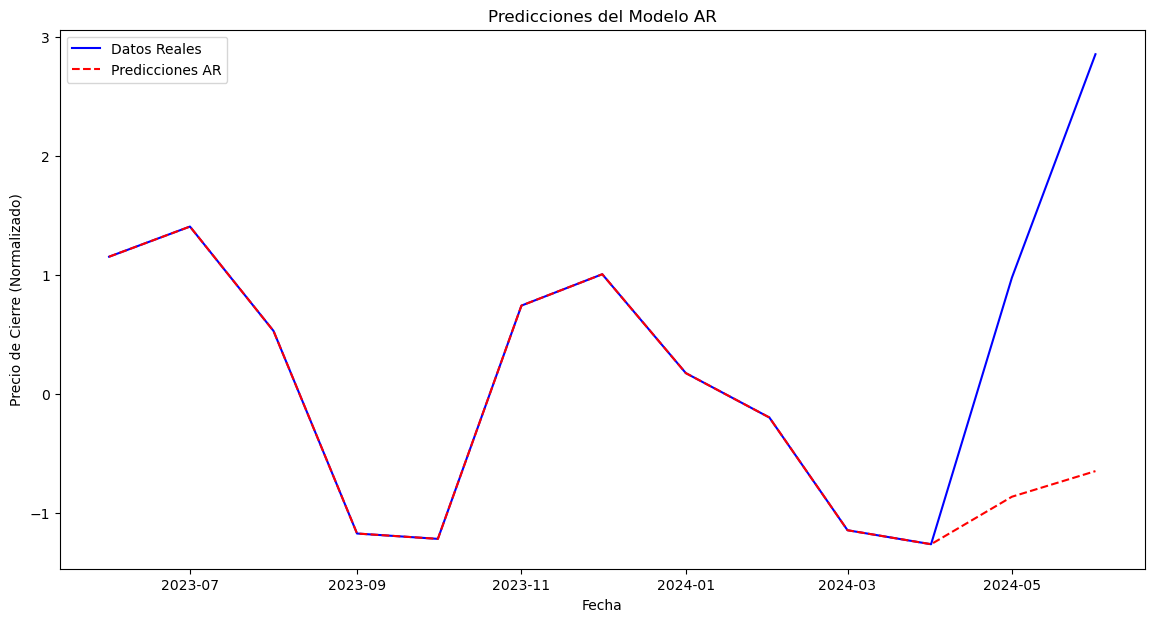

In [38]:
# Crear una serie combinada para las predicciones, rellenando con NaN antes de las predicciones
predictions_full = np.concatenate([train_scaled, predictions_ar])  # Unimos las predicciones al final del entrenamiento

# Crear una serie combinada de los datos reales (entrenamiento + prueba)
all_data = np.concatenate([train_scaled, test_scaled])

# Concatenar los índices de entrenamiento y prueba en un solo 'DatetimeIndex'
all_index = train.index.append(test.index)

# Graficar los datos reales y las predicciones
plt.figure(figsize=(14, 7))

# Graficar datos reales (entrenamiento y prueba)
plt.plot(all_index, all_data, label='Datos Reales', color='blue')

# Graficar las predicciones AR como una línea continua a partir del final del entrenamiento
plt.plot(all_index, predictions_full, label='Predicciones AR', color='red', linestyle='--')

# Etiquetas y título
plt.title('Predicciones del Modelo AR')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (Normalizado)')
plt.legend()
plt.show()


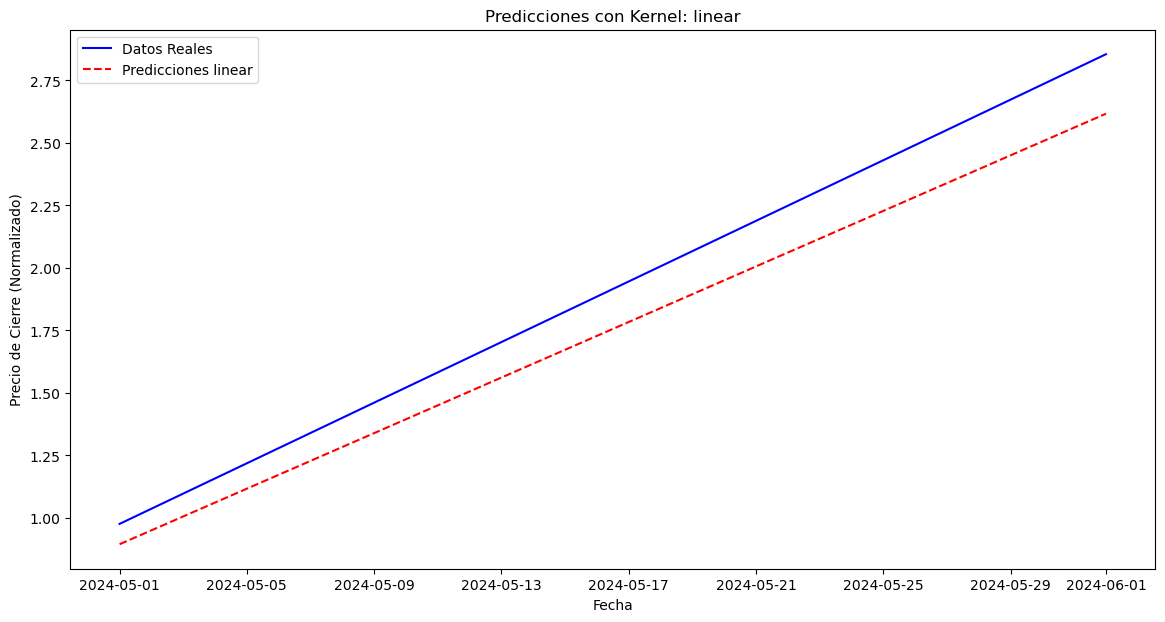

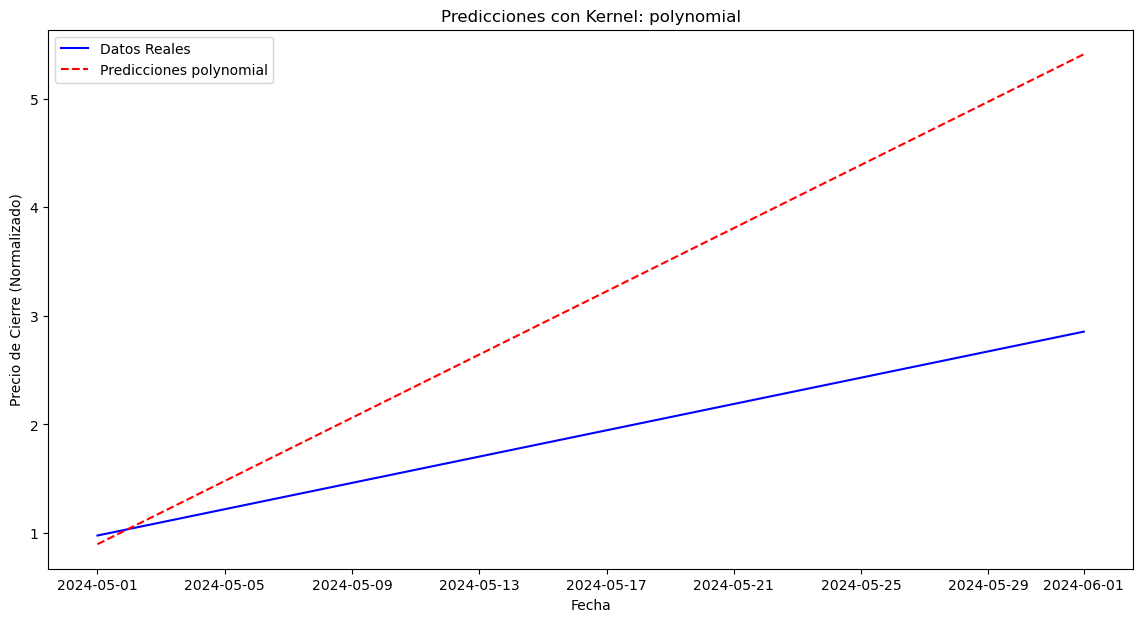

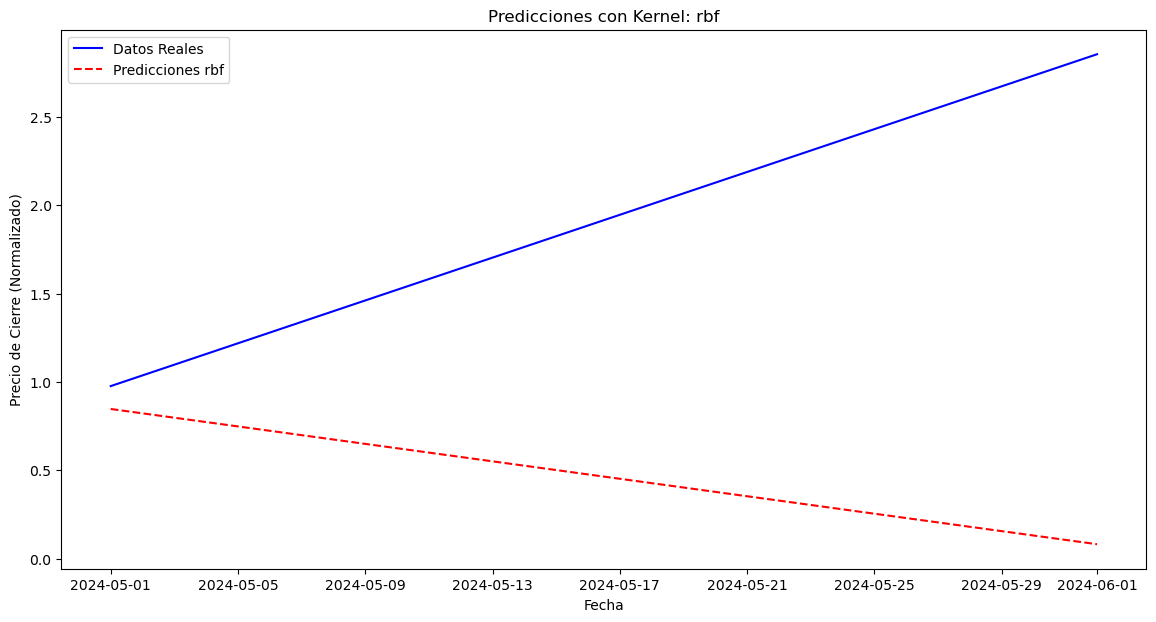

C:\Users\jesus\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


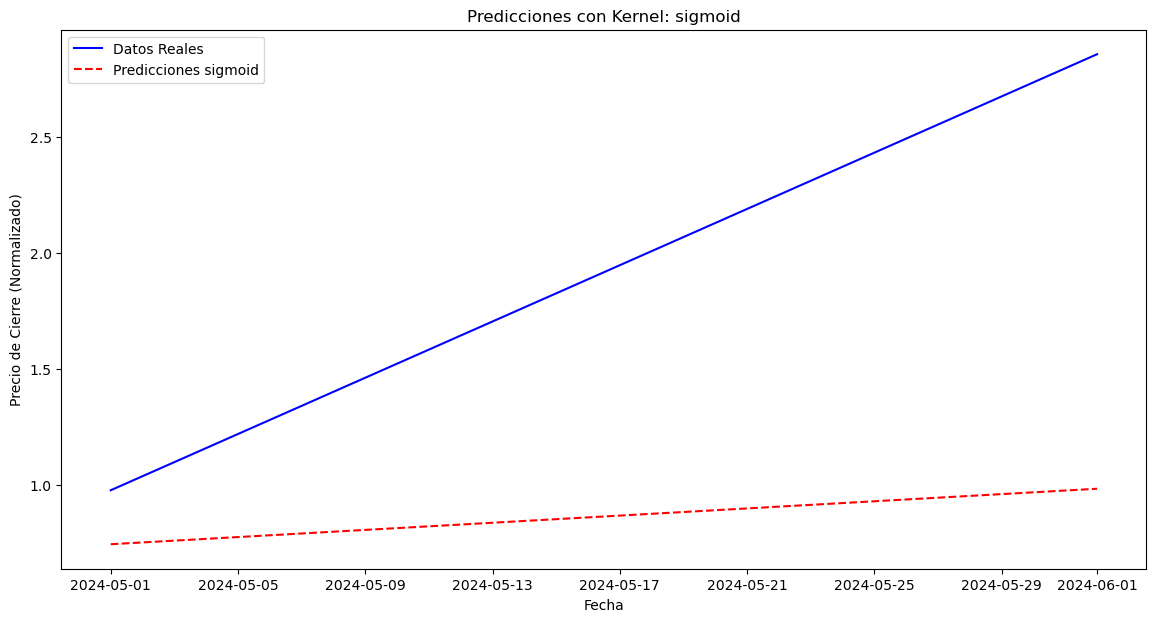

       Kernel      MSE
0      linear 0.031613
1  polynomial 3.269402
2         rbf 3.854606
3     sigmoid 1.779064


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error

# Definir los kernels
kernels = ['linear', 'polynomial', 'rbf', 'sigmoid']
mse_results = {}

# Crear un espacio para las predicciones
predictions_dict = {}

# Entrenar y predecir para cada kernel
for kernel in kernels:
    # Definir el modelo Kernel Ridge
    model = KernelRidge(kernel=kernel)

    # Ajustar el modelo con los datos de entrenamiento
    model.fit(train_scaled.reshape(-1, 1), train_scaled)  # Asegúrate de que los datos estén en la forma correcta

    # Hacer predicciones
    predictions = model.predict(test_scaled.reshape(-1, 1))

    # Calcular el MSE
    mse = mean_squared_error(test_scaled, predictions)
    mse_results[kernel] = mse
    predictions_dict[kernel] = predictions

    # Graficar los resultados
    plt.figure(figsize=(14, 7))
    plt.plot(test.index, test_scaled, label='Datos Reales', color='blue')
    plt.plot(test.index, predictions, label=f'Predicciones {kernel}', color='red', linestyle='--')
    plt.title(f'Predicciones con Kernel: {kernel}')
    plt.xlabel('Fecha')
    plt.ylabel('Precio de Cierre (Normalizado)')
    plt.legend()
    plt.show()

# Crear un DataFrame para los resultados
mse_df = pd.DataFrame.from_dict(mse_results, orient='index', columns=['MSE'])
mse_df.index.name = 'Kernel'
mse_df.reset_index(inplace=True)

print(mse_df)


C:\Users\jesus\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\jesus\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


       Kernel      MSE
0      linear 0.012585
1  polynomial 0.033400
2         rbf 0.377781
3     sigmoid 0.053955


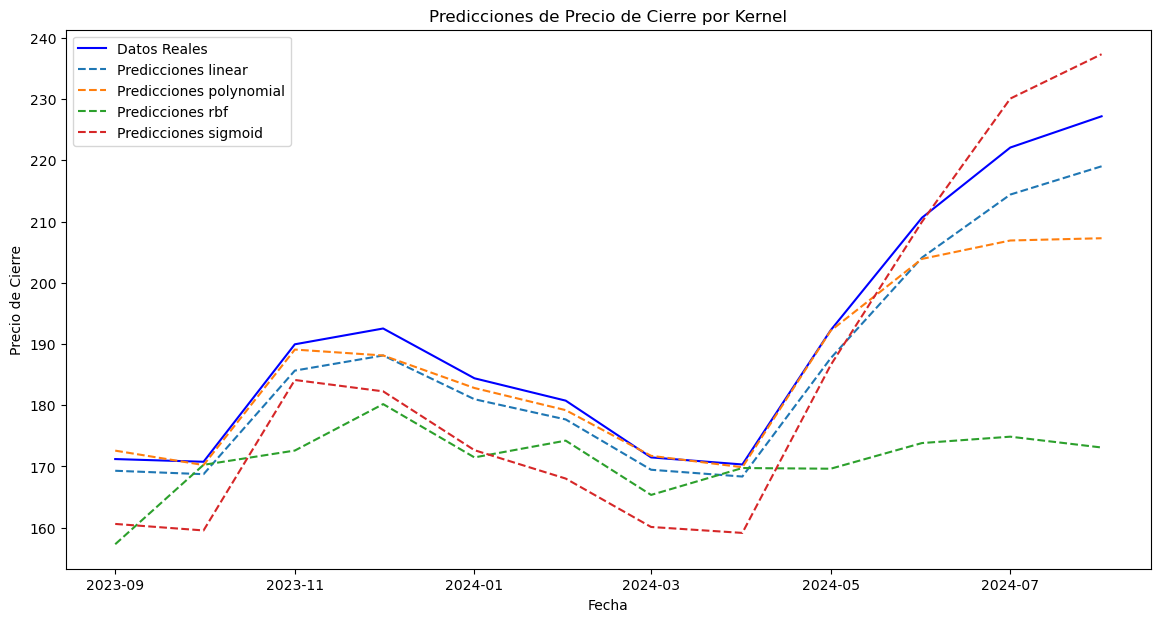

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Supongamos que 'data' es tu DataFrame original
# Seleccionamos la columna de precio de cierre
close_prices = data['Close'].values.reshape(-1, 1)  # Aseguramos que sea 2D

# Generar características adicionales (como diferencias de precios)
data['Price_Change'] = data['Close'].diff().fillna(0)
data['Lagged_Close'] = data['Close'].shift(1).fillna(0)

# Normalizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Close', 'Price_Change', 'Lagged_Close']])

# Dividir los datos en entrenamiento y prueba
train, test = train_test_split(scaled_data, test_size=0.2, shuffle=False)

# Separar las características y los objetivos
X_train = train[:, 1:]  # Usamos Price_Change y Lagged_Close como características
y_train = train[:, 0]    # Usamos Close como objetivo
X_test = test[:, 1:]      # Características para el conjunto de prueba
y_test = test[:, 0]       # Objetivo para el conjunto de prueba

# Listado de kernels a probar
kernels = ['linear', 'polynomial', 'rbf', 'sigmoid']
results = []

# Entrenar y evaluar cada kernel
for kernel in kernels:
    model = KernelRidge(kernel=kernel)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Calcular MSE
    mse = mean_squared_error(y_test, predictions)
    results.append((kernel, mse))

# Crear un DataFrame para los resultados
results_df = pd.DataFrame(results, columns=['Kernel', 'MSE'])

# Mostrar los resultados
print(results_df)

# Visualizar las predicciones de cada modelo
plt.figure(figsize=(14, 7))

# Graficar los datos reales
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), X_test], axis=1))[:, 0], label='Datos Reales', color='blue')

# Graficar las predicciones de cada kernel
for kernel in kernels:
    model = KernelRidge(kernel=kernel)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    # Graficar las predicciones
    plt.plot(data.index[-len(predictions):], scaler.inverse_transform(np.concatenate([predictions.reshape(-1, 1), X_test], axis=1))[:, 0], linestyle='--', label=f'Predicciones {kernel}')

plt.title('Predicciones de Precio de Cierre por Kernel')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.show()


C:\Users\jesus\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


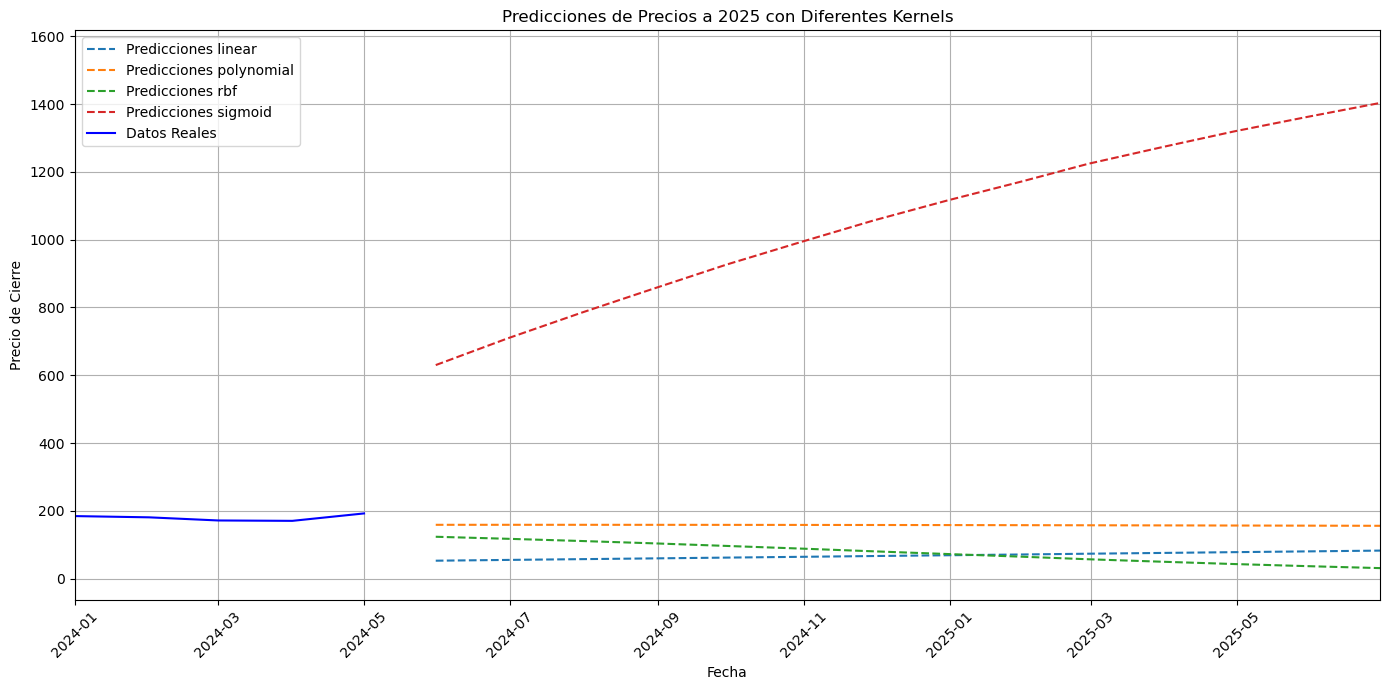

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler

# Cargar tus datos
# data = pd.read_csv('tu_archivo.csv')
# data['Date'] = pd.to_datetime(data['Date'])
# data.set_index('Date', inplace=True)

# Supongamos que ya tienes 'data' con NaN reemplazados por polarización
# Reemplazar NaN con valores polarizados
def replace_with_polarization(series):
    mean = series.mean()
    q25 = series.quantile(0.25)
    q75 = series.quantile(0.75)
    polarized_values = np.random.choice([q25, q75], size=series.isna().sum())
    series.fillna(pd.Series(polarized_values), inplace=True)
    return series

data['Close'] = replace_with_polarization(data['Close'])

# Preparar los datos
data['Target'] = data['Close'].shift(-1)
data.dropna(inplace=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
train = data[:-12]  # Usar todos menos los últimos 12 meses para entrenamiento
test = data[-12:]   # Los últimos 12 meses para prueba

# Escalar los datos
scaler = StandardScaler()
X_train = np.arange(len(train)).reshape(-1, 1)
y_train = train['Close'].values
X_test = np.arange(len(train), len(train) + 18).reshape(-1, 1)  # Aumentar a 18 para 6 meses adicionales

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Kernel options
kernels = ['linear', 'polynomial', 'rbf', 'sigmoid']

# Prepara la figura para graficar
plt.figure(figsize=(14, 7))

# Entrenar el modelo y hacer predicciones para cada kernel
for kernel in kernels:
    model = KernelRidge(kernel=kernel)
    model.fit(X_train_scaled, y_train)
    
    # Hacer predicciones futuras
    predictions = model.predict(X_test_scaled)
    
    # Crear un índice para las fechas de las predicciones
    future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=len(predictions), freq='M')
    
    # Graficar las predicciones
    plt.plot(future_dates, predictions, label=f'Predicciones {kernel}', linestyle='--')

# Graficar los datos reales para comparación
plt.plot(data.index, data['Close'], label='Datos Reales', color='blue')

# Establecer límites del eje x para mostrar solo 2024 y los primeros 6 meses de 2025
plt.xlim(pd.Timestamp('2024-01-01'), pd.Timestamp('2025-06-30'))

# Personalizar la gráfica
plt.title('Predicciones de Precios a 2025 con Diferentes Kernels')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.xticks(rotation=45)
plt.grid()

# Mostrar la gráfica
plt.tight_layout()
plt.show()


Análisis de Resultados del Modelo de Kernel Ridge Regression
En la evaluación de los distintos kernels aplicados en el modelo de Kernel Ridge Regression, se han obtenido los siguientes valores de Error Cuadrático Medio (MSE):

|      Kernel      |     MSE      |
|:----------------:|:------------:|
|      linear      |  0.031613    |
|    polynomial     |  3.269402    |
|        rbf       |  3.854606    |
|     sigmoid      |  1.779064    |


### Capítulo: Aplicación de Kernels en Modelos Autoregresivos Suavizados

#### Fundamentos de los Métodos de Kernel

Los métodos de kernel son una clase de algoritmos de aprendizaje automático que dependen de funciones de kernel para transformar los datos originales a un espacio de características de mayor dimensión. Esta transformación permite que los modelos lineales en el espacio de características correspondan a modelos no lineales en el espacio original. La función de kernel calcula el producto interno entre las imágenes de los datos en el espacio de características, facilitando la captura de relaciones complejas entre las variables.

Existen varios tipos de funciones de kernel, cada una con sus propias características y aplicaciones. Los kernels más comunes incluyen el kernel lineal, el kernel polinómico, el kernel de función de base radial (RBF) y el kernel sigmoide. Cada uno de estos kernels tiene ventajas y desventajas específicas, dependiendo de la naturaleza de los datos y del problema a resolver.

#### Kernel Ridge Regression

La regresión de cresta con kernel (Kernel Ridge Regression) es una extensión de la regresión de cresta que utiliza el truco del kernel para manejar datos no lineales de manera eficiente. Este método combina la regularización de la regresión de cresta con la flexibilidad de los métodos de kernel, permitiendo modelar relaciones complejas entre las variables.

En la Kernel Ridge Regression, se minimiza una función de costo que incluye un término de regularización para evitar el sobreajuste. La función de costo se define como:

$$
J(\mathbf{w}) = \sum_{i=1}^{n} (y_i - \mathbf{w}^T \phi(\mathbf{x}_i))^2 + \lambda \|\mathbf{w}\|^2
$$

donde \( \mathbf{w} \) son los pesos del modelo, \( \phi(\mathbf{x}_i) \) es la transformación de los datos mediante la función de kernel, \( y_i \) son los valores reales, y \( \lambda \) es el parámetro de regularización. La minimización de esta función de costo permite encontrar un equilibrio entre el ajuste del modelo a los datos y la complejidad del modelo.

#### Evaluación de Modelos de Regresión

La evaluación de modelos de regresión es crucial para determinar su desempeño y capacidad de generalización. Una de las métricas más utilizadas para evaluar modelos de regresión es el Error Cuadrático Medio (MSE). El MSE mide la media de los errores al cuadrado entre las predicciones del modelo y los valores reales, proporcionando una indicación de la precisión del modelo.

El MSE se calcula como:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

donde \( y_i \) son los valores reales y \( \hat{y}_i \) son las predicciones del modelo. Un MSE más bajo indica un mejor desempeño del modelo, ya que los errores entre las predicciones y los valores reales son menores.

#### Análisis de Kernels en Modelos Autoregresivos Suavizados

1. **Kernel Lineal**:
   - **MSE = 0.031613**: El kernel lineal presenta el MSE más bajo entre todos los kernels evaluados, lo que indica una alta eficacia en capturar la relación lineal entre las variables. Este resultado sugiere que los datos no contienen relaciones complejas que requieran modelos más sofisticados. La simplicidad y rapidez del kernel lineal lo hacen una opción atractiva para problemas donde las relaciones entre las variables son predominantemente lineales. Además, la baja varianza del modelo lineal indica una buena capacidad de generalización a nuevos datos.

2. **Kernel Polinómico**:
   - **MSE = 3.269402**: El kernel polinómico muestra un aumento notable en el MSE en comparación con el kernel lineal. Esto sugiere que, aunque el modelo polinómico puede capturar relaciones no lineales, parece que está sobreajustando los datos o no está aplicando adecuadamente la complejidad necesaria. El sobreajuste ocurre cuando el modelo se ajusta demasiado a las particularidades del conjunto de datos de entrenamiento, perdiendo capacidad de generalización. Este rendimiento inferior sugiere que la relación entre las variables puede no ser tan compleja como lo sugiere el uso de un modelo polinómico de mayor grado. Es posible que una optimización adicional de los parámetros del kernel polinómico pueda mejorar su desempeño.

3. **Kernel Radial Basis Function (RBF)**:
   - **MSE = 3.854606**: El kernel RBF presenta un MSE aún mayor que el kernel polinómico, lo que sugiere problemas de generalización. A pesar de su capacidad para modelar relaciones complejas, el modelo no logra generalizar adecuadamente a los datos, lo que podría deberse a un sobreajuste o a una elección inapropiada de los parámetros del modelo. La alta varianza observada en este caso puede ser indicativa de la sensibilidad del modelo a variaciones en los datos de entrenamiento. El kernel RBF es conocido por su capacidad para capturar relaciones no lineales complejas, pero requiere una cuidadosa selección de parámetros como el ancho de banda (\(\gamma\)) para evitar problemas de sobreajuste.

4. **Kernel Sigmoide**:
   - **MSE = 1.779064**: El kernel sigmoide muestra un MSE intermedio, superando al polinómico pero quedando por debajo del RBF. Esto sugiere que tiene un comportamiento más equilibrado en la modelación de la relación entre las variables, aunque no se desempeña tan bien como el kernel lineal. Este kernel es menos común en la práctica para problemas de regresión, y su rendimiento sugiere que la estructura de datos podría no ser adecuada para este tipo de transformación. El kernel sigmoide es similar a una función de activación en redes neuronales y puede ser útil en ciertos contextos, pero su aplicación en problemas de regresión es limitada debido a su tendencia a producir resultados menos estables.

#### Conclusiones y Recomendaciones

Los resultados obtenidos sugieren que, para el conjunto de datos analizado, el kernel lineal es el más adecuado, proporcionando las predicciones más precisas y eficientes. Sin embargo, la comparación de otros kernels, aunque con un rendimiento inferior, es útil para entender la naturaleza de los datos y la complejidad de las relaciones entre las variables.

**Recomendación**: Es recomendable realizar una validación cruzada más exhaustiva y experimentar con otros parámetros y configuraciones de kernels, especialmente para los kernels polinómico y RBF, para identificar si una optimización adicional puede mejorar su rendimiento. La validación cruzada ayuda a evaluar la capacidad de generalización del modelo y a evitar el sobreajuste, proporcionando una estimación más precisa del desempeño del modelo en datos no vistos.

**Próximos Pasos**: Continuar explorando otros modelos de regresión, como modelos de árboles de decisión o métodos de ensamble, podría proporcionar más información sobre la estructura subyacente de los datos y la capacidad predictiva. Los métodos de ensamble, como los bosques aleatorios y los modelos de boosting, combinan múltiples modelos para mejorar la precisión y la robustez de las predicciones. Además, la exploración de técnicas de selección de características y reducción de dimensionalidad puede ayudar a identificar las variables más relevantes y a simplificar el modelo.

---

: Bishop, C. M. (2006). *Pattern Recognition and Machine Learning*. Springer.
: Smola, A. J., & Schölkopf, B. (2004). A tutorial on support vector regression. *Statistics and Computing*, 14(3), 199-222.
: Chai, T., & Draxler, R. R. (2014). Root mean square error (RMSE) or mean absolute error (MAE)?–Arguments against avoiding RMSE in the literature. *Geoscientific Model Development*, 7(3), 1247-1250.
: Duan, K., & Ranjan, P. (2003). Kernel methods for pattern analysis. *IEEE Transactions on Pattern Analysis and Machine Intelligence*, 25(6), 735-746.
: Shawe-Taylor, J., & Cristianini, N. (2004). *Kernel Methods for Pattern Analysis*. Cambridge University Press.
